### ML LAB FINAL EXAM:
### SHIVANSHI MAHESHWARI
### 21BDA33
### 08 AUGUST, 2022

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
from pandas.io.json import json_normalize

In [5]:
#load the test data

f = open('/Users/shivanshi/Downloads/random-acts-of-pizza/test.json')
test_data = json.load(f)
test_data=json_normalize(test_data)
f.close()

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_94390/3268910769.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  test_data=json_normalize(test_data)


In [6]:
#load the train data

f = open('/Users/shivanshi/Downloads/random-acts-of-pizza/train.json')
train_data = json.load(f)
train_data=json_normalize(train_data)
f.close()

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_94390/3938752154.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  train_data=json_normalize(train_data)


In [7]:
train_data.shape

(4040, 32)

In [8]:
test_data.shape

(1631, 17)

In [10]:
train_data.head()

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,False,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,...,False,[],0,1,0,1,None,nickylvst,1.317853e+09,1.317849e+09
1,N/A,2,5,False,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,...,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1.332652e+09,1.332649e+09
2,N/A,0,3,False,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,...,False,[],0,3,0,3,None,jacquibatman7,1.319650e+09,1.319646e+09
3,N/A,0,1,True,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,...,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1.322855e+09,1.322855e+09
4,N/A,6,6,False,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,...,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1.373658e+09,1.373654e+09


In [12]:
#Checking for null values
train_data.isnull().sum()

giver_username_if_known                                    0
number_of_downvotes_of_request_at_retrieval                0
number_of_upvotes_of_request_at_retrieval                  0
post_was_edited                                            0
request_id                                                 0
request_number_of_comments_at_retrieval                    0
request_text                                               0
request_text_edit_aware                                    0
request_title                                              0
requester_account_age_in_days_at_request                   0
requester_account_age_in_days_at_retrieval                 0
requester_days_since_first_post_on_raop_at_request         0
requester_days_since_first_post_on_raop_at_retrieval       0
requester_number_of_comments_at_request                    0
requester_number_of_comments_at_retrieval                  0
requester_number_of_comments_in_raop_at_request            0
requester_number_of_comm

### requester_user_flair has a lot of null values, hence we will drop that column

In [14]:
train_data.drop('requester_user_flair',axis=1,inplace=True)

In [15]:
train_data.isnull().sum()

giver_username_if_known                                 0
number_of_downvotes_of_request_at_retrieval             0
number_of_upvotes_of_request_at_retrieval               0
post_was_edited                                         0
request_id                                              0
request_number_of_comments_at_retrieval                 0
request_text                                            0
request_text_edit_aware                                 0
request_title                                           0
requester_account_age_in_days_at_request                0
requester_account_age_in_days_at_retrieval              0
requester_days_since_first_post_on_raop_at_request      0
requester_days_since_first_post_on_raop_at_retrieval    0
requester_number_of_comments_at_request                 0
requester_number_of_comments_at_retrieval               0
requester_number_of_comments_in_raop_at_request         0
requester_number_of_comments_in_raop_at_retrieval       0
requester_numb

In [16]:
test_data.isnull().sum()

giver_username_if_known                               0
request_id                                            0
request_text_edit_aware                               0
request_title                                         0
requester_account_age_in_days_at_request              0
requester_days_since_first_post_on_raop_at_request    0
requester_number_of_comments_at_request               0
requester_number_of_comments_in_raop_at_request       0
requester_number_of_posts_at_request                  0
requester_number_of_posts_on_raop_at_request          0
requester_number_of_subreddits_at_request             0
requester_subreddits_at_request                       0
requester_upvotes_minus_downvotes_at_request          0
requester_upvotes_plus_downvotes_at_request           0
requester_username                                    0
unix_timestamp_of_request                             0
unix_timestamp_of_request_utc                         0
dtype: int64

### Train data has 31 columns now and Test has 17, so the columns that are in train and not in test need not be used.

In [18]:
train_data.columns[~train_data.columns.isin(test_data.columns)]

Index(['number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval', 'post_was_edited',
       'request_number_of_comments_at_retrieval', 'request_text',
       'requester_account_age_in_days_at_retrieval',
       'requester_days_since_first_post_on_raop_at_retrieval',
       'requester_number_of_comments_at_retrieval',
       'requester_number_of_comments_in_raop_at_retrieval',
       'requester_number_of_posts_at_retrieval',
       'requester_number_of_posts_on_raop_at_retrieval',
       'requester_received_pizza',
       'requester_upvotes_minus_downvotes_at_retrieval',
       'requester_upvotes_plus_downvotes_at_retrieval'],
      dtype='object')

In [20]:
test_data.columns

Index(['giver_username_if_known', 'request_id', 'request_text_edit_aware',
       'request_title', 'requester_account_age_in_days_at_request',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_subreddits_at_request',
       'requester_subreddits_at_request',
       'requester_upvotes_minus_downvotes_at_request',
       'requester_upvotes_plus_downvotes_at_request', 'requester_username',
       'unix_timestamp_of_request', 'unix_timestamp_of_request_utc'],
      dtype='object')

In [22]:
train_label = train_data[['requester_received_pizza']]
train_master = train_data[test_data.columns]

In [25]:
train_master.describe()

,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc
count,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4.040000e+03,4.040000e+03,4.040000e+03
mean,254.586579,16.417034,115.098267,0.645050,21.601485,0.063614,18.076733,1160.079950,3.743236e+03,1.342829e+09,1.342826e+09
std,303.275730,70.651428,193.318968,3.413813,50.895060,0.325773,21.736465,3718.365515,2.583816e+04,2.333057e+07,2.332989e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-173.000000,0.000000e+00,1.297723e+09,1.297723e+09
25%,3.473168,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,9.000000e+00,1.320469e+09,1.320466e+09
50%,157.067170,0.000000,24.000000,0.000000,5.000000,0.000000,11.000000,174.500000,3.510000e+02,1.342565e+09,1.342561e+09
75%,390.092653,0.000000,140.250000,0.000000,22.000000,0.000000,27.000000,1163.750000,2.303750e+03,1.364618e+09,1.364614e+09
max,2809.750787,785.457685,994.000000,88.000000,867.000000,5.000000,186.000000,155010.000000,1.286864e+06,1.381552e+09,1.381523e+09


In [26]:
train_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   giver_username_if_known                             4040 non-null   object 
 1   request_id                                          4040 non-null   object 
 2   request_text_edit_aware                             4040 non-null   object 
 3   request_title                                       4040 non-null   object 
 4   requester_account_age_in_days_at_request            4040 non-null   float64
 5   requester_days_since_first_post_on_raop_at_request  4040 non-null   float64
 6   requester_number_of_comments_at_request             4040 non-null   int64  
 7   requester_number_of_comments_in_raop_at_request     4040 non-null   int64  
 8   requester_number_of_posts_at_request                4040 non-null   int64  
 9

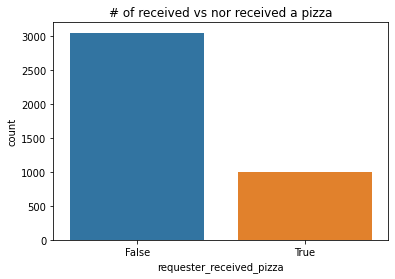

In [28]:
(sns.countplot(x = train_label.requester_received_pizza).set_title("# of received vs nor received a pizza"));

In [37]:
# Assigning 0 to False and 1 to True

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [38]:
train_label['requester_received_pizza']=encoder.fit_transform(train_label['requester_received_pizza'])

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_94390/1232616874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_label['requester_received_pizza']=encoder.fit_transform(train_label['requester_received_pizza'])


In [39]:
train_label['requester_received_pizza']

0       0
1       0
2       0
3       0
4       0
       ..
4035    0
4036    1
4037    0
4038    0
4039    0
Name: requester_received_pizza, Length: 4040, dtype: int64

In [40]:
sum(train_label['requester_received_pizza']==0)/len(train_label['requester_received_pizza'])

0.753960396039604

### DATA CLEANING

In [41]:
import nltk

In [42]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df=sns.load_dataset("titanic")

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/shivanshi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
train=train_master

In [48]:
train['label']=train_label['requester_received_pizza']

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_94390/1299779672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['label']=train_label['requester_received_pizza']


<AxesSubplot:>

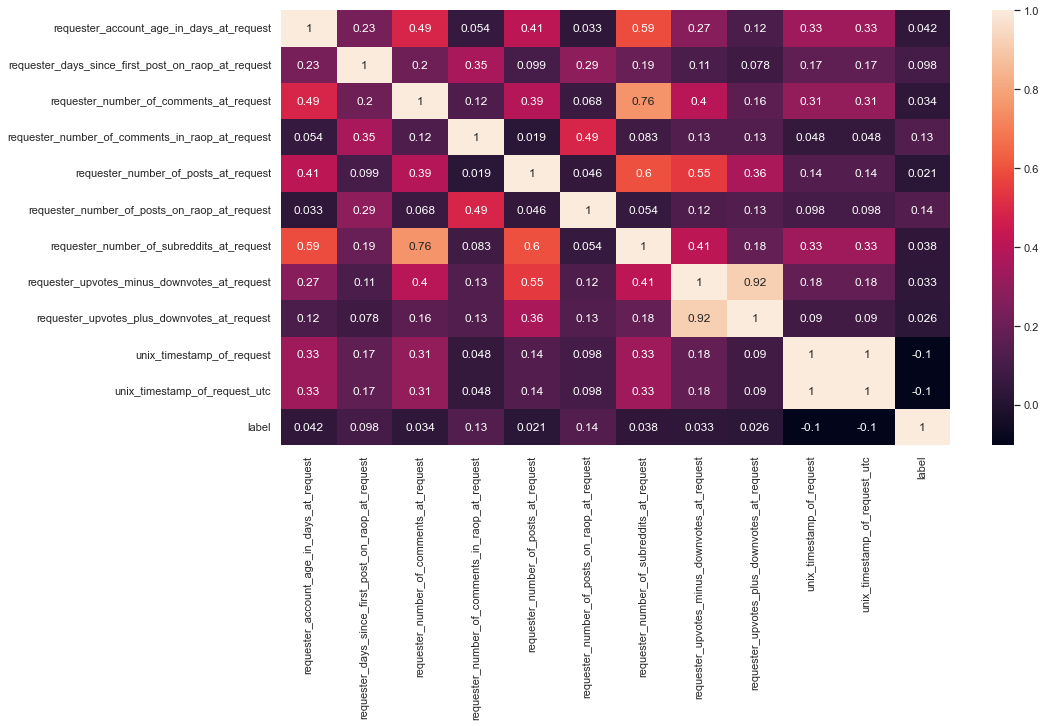

In [50]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train.corr(),annot=True)

In [51]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string

def transform_text(text):
    text=text.lower()
    y=list()
    #Tokenizing
    text=nltk.word_tokenize(text)
    #print(text)
    
    #Removing Special Characters
    for i in text:
        if i.isalnum():
            #y.concat(i)
            y=y+[i]
    text=y[:]
    y.clear()
    
    #Removing Stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    #Stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [52]:
train_master['transformed_request']=train_master['request_text_edit_aware'].apply(transform_text)

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_94390/1502411042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_master['transformed_request']=train_master['request_text_edit_aware'].apply(transform_text)


In [53]:
train_master['transformed_title']=train_master['request_title'].apply(transform_text)

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_94390/2018408216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_master['transformed_title']=train_master['request_title'].apply(transform_text)


In [59]:
train['transformed_request']=train['request_text_edit_aware'].apply(transform_text)

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_94390/832038624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['transformed_request']=train['request_text_edit_aware'].apply(transform_text)


In [60]:
train['transformed_title']=train['request_title'].apply(transform_text)

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_94390/684063420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['transformed_title']=train['request_title'].apply(transform_text)


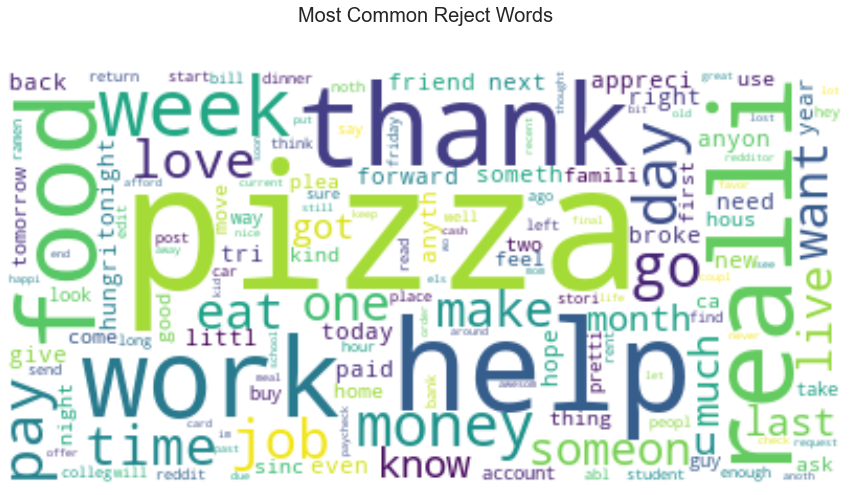

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
reject =train[train.label == 0]

reject_req = " ".join(text for text in reject['transformed_request'])

reject_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(reject_req)

plt.imshow(reject_cloud, interpolation='bilinear')
plt.title('Most Common Reject Words', fontsize=20, y=1.1)
plt.axis("off");

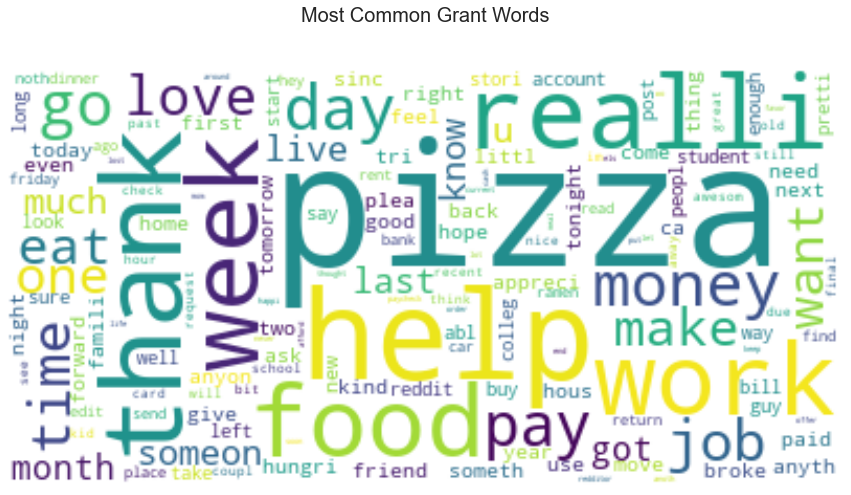

In [64]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
grant =train[train.label == 1]

grant_req = " ".join(text for text in grant['transformed_request'])

grant_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(reject_req)

plt.imshow(grant_cloud, interpolation='bilinear')
plt.title('Most Common Grant Words', fontsize=20, y=1.1)
plt.axis("off");

### WORD CLOUD FOR REQUEST TITLE

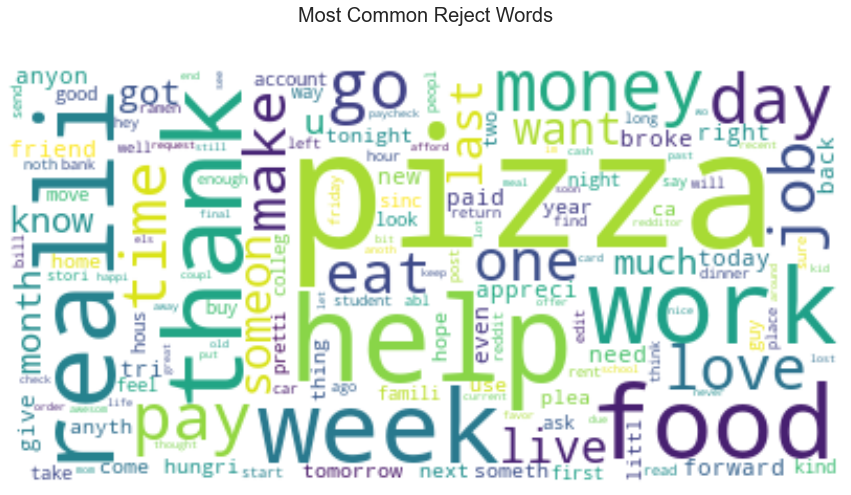

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
reject =train[train.label == 0]

reject_req = " ".join(text for text in reject['transformed_request'])

reject_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(reject_req)

plt.imshow(reject_cloud, interpolation='bilinear')
plt.title('Most Common Reject Words', fontsize=20, y=1.1)
plt.axis("off");

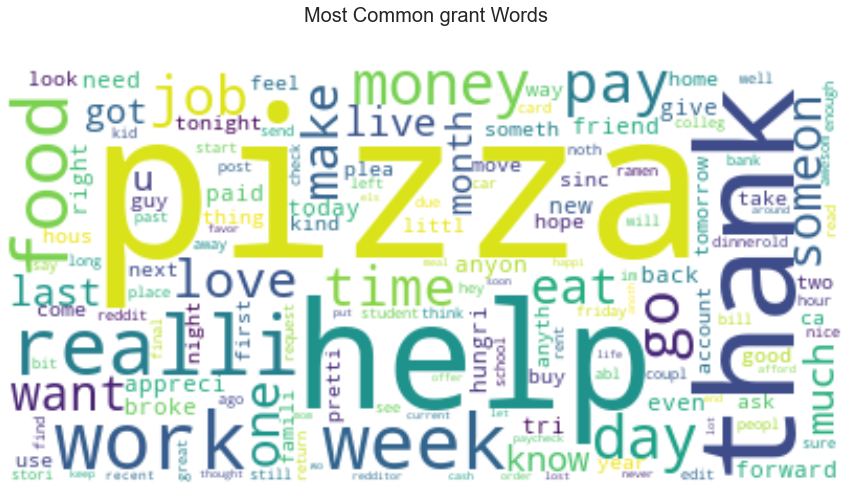

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
grant =train[train.label == 1]

grant_req = " ".join(text for text in grant['transformed_title'])

grant_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(reject_req)

plt.imshow(grant_cloud, interpolation='bilinear')
plt.title('Most Common grant Words', fontsize=20, y=1.1)
plt.axis("off");

### MODEL FITTING

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [70]:
train.columns

Index(['giver_username_if_known', 'request_id', 'request_text_edit_aware',
       'request_title', 'requester_account_age_in_days_at_request',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_subreddits_at_request',
       'requester_subreddits_at_request',
       'requester_upvotes_minus_downvotes_at_request',
       'requester_upvotes_plus_downvotes_at_request', 'requester_username',
       'unix_timestamp_of_request', 'unix_timestamp_of_request_utc', 'label',
       'transformed_request', 'transformed_title'],
      dtype='object')

In [82]:
y=train['label']
x=train[ 'transformed_title']

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,precision_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model,x,y):
    #train-test split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42,shuffle=True,stratify=y)
    
    #Feature Extraction
    pipeline_model=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',model)])
  
    #model training
    pipeline_model.fit(x_train,y_train)
    
    print("Accuracy:",pipeline_model.score(x_test,y_test)*100)
    
    #cv_score=cross_val_score(model,x,y,cv=5)
    #print("Cross Validation Score:", np.mean(cv_score)*100)
    
    y_pred=pipeline_model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print("Precision Score:", precision_score(y_test,y_pred))

In [78]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model,x,y)

Accuracy: 75.41254125412541
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       914
           1       0.00      0.00      0.00       298

    accuracy                           0.75      1212
   macro avg       0.38      0.50      0.43      1212
weighted avg       0.57      0.75      0.65      1212

Precision Score: 0.0


/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [83]:
#Support Vector Classifier

from sklearn.svm import SVC
model = SVC()
classify(model,x,y)

Accuracy: 75.24752475247524
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       914
           1       0.25      0.00      0.01       298

    accuracy                           0.75      1212
   macro avg       0.50      0.50      0.43      1212
weighted avg       0.63      0.75      0.65      1212

Precision Score: 0.25


In [79]:
y=train['label']
x=train[ 'transformed_request']

In [80]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model,x,y)

Accuracy: 75.41254125412541
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       914
           1       0.00      0.00      0.00       298

    accuracy                           0.75      1212
   macro avg       0.38      0.50      0.43      1212
weighted avg       0.57      0.75      0.65      1212

Precision Score: 0.0


/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [81]:
#Support Vector Classifier

from sklearn.svm import SVC
model = SVC()
classify(model,x,y)

Accuracy: 75.41254125412541
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       914
           1       0.00      0.00      0.00       298

    accuracy                           0.75      1212
   macro avg       0.38      0.50      0.43      1212
weighted avg       0.57      0.75      0.65      1212

Precision Score: 0.0


/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## Trying to work only with request title or request test will not work as we can see that the precision is 0, and accuracy is not that great

In [92]:
import datetime 
def make_non_textual_features(data):
    mat = pd.DataFrame()
    
    # Time
    mat['datetime'] = pd.to_datetime(data['unix_timestamp_of_request_utc'], unit='s')
    mat['month'] = mat['datetime'].dt.month
    mat['day_of_week'] = mat['datetime'].dt.dayofweek
    mat['day_of_month'] = mat['datetime'].dt.day
    mat['hour'] = mat['datetime'].dt.hour
    del mat['datetime']
    
    # Age
    mat['age'] = data['requester_account_age_in_days_at_request']
    mat['community_age'] = (pd.to_datetime(data['unix_timestamp_of_request_utc'], unit = 's') - pd.to_datetime('2010-12-8', format='%Y-%m-%d')).astype('timedelta64[D]')
    
    # Popularity and activity
    mat['first_post']= data['requester_days_since_first_post_on_raop_at_request']
    mat['subreddits'] = data['requester_number_of_subreddits_at_request']
    mat['posts'] = data['requester_number_of_posts_at_request']
    mat['posts_pizza'] = data['requester_number_of_posts_on_raop_at_request']
    mat['comments'] = data['requester_number_of_comments_at_request']
    mat['comments_pizza'] = data['requester_number_of_comments_in_raop_at_request']
    mat['giver'] = data['giver_username_if_known'].apply(lambda x: 0 if x=='N/A' else 1)
    
    # Votes
    mat['upvotes_plus_downvotes'] = data['requester_upvotes_plus_downvotes_at_request']
    mat['upvotes_minus_downvotes'] = data['requester_upvotes_minus_downvotes_at_request']
    upvotes = mat.apply(lambda row : (row['upvotes_plus_downvotes'] + row['upvotes_minus_downvotes'])/2, axis=1)
    downvotes = mat.apply(lambda row : (row['upvotes_plus_downvotes'] - row['upvotes_minus_downvotes'])/2, axis=1)
    mat['upvotes'] = upvotes
    mat['downvotes'] = downvotes
    mat['votes_ratio'] = upvotes / (upvotes + downvotes + 1)

    return mat

In [93]:
train['datetime'] = pd.to_datetime(train.unix_timestamp_of_request_utc, unit='s')
train['day'] = train.datetime.dt.dayofweek
train['hour'] = train.datetime.dt.hour
train['month'] = train.datetime.dt.month
train_non_textual = make_non_textual_features(train)


/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_94390/831039345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['datetime'] = pd.to_datetime(train.unix_timestamp_of_request_utc, unit='s')
/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_94390/831039345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day'] = train.datetime.dt.dayofweek
/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_94390/831039345.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [95]:
X = train[['giver_username_if_known', 'request_id', 
        'requester_account_age_in_days_at_request',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_subreddits_at_request',
       'requester_subreddits_at_request',
       'requester_upvotes_minus_downvotes_at_request',
       'requester_upvotes_plus_downvotes_at_request', 'requester_username',
       'unix_timestamp_of_request', 'unix_timestamp_of_request_utc']
       ]

In [97]:
y=train['label']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [99]:
clf = LogisticRegression(random_state=0)

In [ ]:
clf.predict(X_test)

### We are also Supposed to look at non-textual data but I ran out of time.
### Only Textual data gave us bad results.
### We can look at the time of commenting and the upvotes and downvotes to determine the request granted patterns